# GRIP : The Sparks Foundation
## GRIPDECEMBER22

## Name: Ines Chanbi

### Data Science and Business Intelligence Internship

### Task 6 - Prediction using Decision Tree Algorithm

### Dataset is available at: https://bit.ly/3kXTdox

#### Importing all necessary Libraries


In [84]:
#---------------------------------------------
# Importing the required libraries
import pandas as pd # Importing the pandas library
import numpy as np # Importing the numpy library
import seaborn as sb # Importing the seaborn library
import matplotlib.pyplot as plt # Importing the matplotlib library
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing the train_test_split function
from sklearn import metrics #Importing the scikit learn metrics module
import plotly.express as px

In [107]:
# Loading the iris dataset
data=pd.read_csv("Iris.csv")
# Forming the iris dataframe
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
# Displaying the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [109]:
# Seeing the data types of the entries in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [110]:
# Displaying the summary of the data set.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [111]:
# Checking for missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# There's no missing values !!


In [112]:
df.shape

(150, 6)

In [113]:
# removing the column Id because there is no need of it 
df = df.drop(['Id'],axis = 1)
df.head()   # printing head( first few rows) of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
df.shape

(150, 5)

In [115]:
df.Species.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [116]:
#check duplicate values

df.duplicated().sum()

3

In [117]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df.shape

(147, 5)

In [118]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [119]:
df.duplicated().sum()

0

In [120]:
df.Species.value_counts()


Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# Visualizing the dataset


###### Seeing the frequency of each species having various values
###### for each of the attributes : [Sepal Length, Sepal Width, Petal Length , Petal width]


In [121]:
px.histogram(df,x="SepalLengthCm", color="Species",barmode="group")

In [122]:
px.histogram(df,x="SepalWidthCm", color="Species",barmode="group")

In [123]:
px.histogram(df,x="PetalLengthCm", color="Species",barmode="group")

In [124]:
px.histogram(df,x="PetalWidthCm", color="Species",barmode="group")

In [125]:
dff = px.data.iris()
fig = px.scatter(dff, x="sepal_width", y="sepal_length", color='petal_length')
fig.show()

#### Now we will get the target values and feature values.


In [126]:
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[feature_cols]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [127]:
y = df.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Further, we will split the dataset into the training and test dataset!!

In [144]:
## Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


## Decision Tree classifier


In [145]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

####  Fitting the model to our train dataset.


In [146]:
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [147]:
# Predicting the values for the test dataset.


In [148]:
y_pred = model.predict(X_test)


In [149]:
# Calculating the Accuracy of our trained model.


In [150]:
print("Accuracy(%):",metrics.accuracy_score(y_test,y_pred)*100,"%")


Accuracy(%): 97.2972972972973 %


###  Visualizing the Descision Tree Classifier


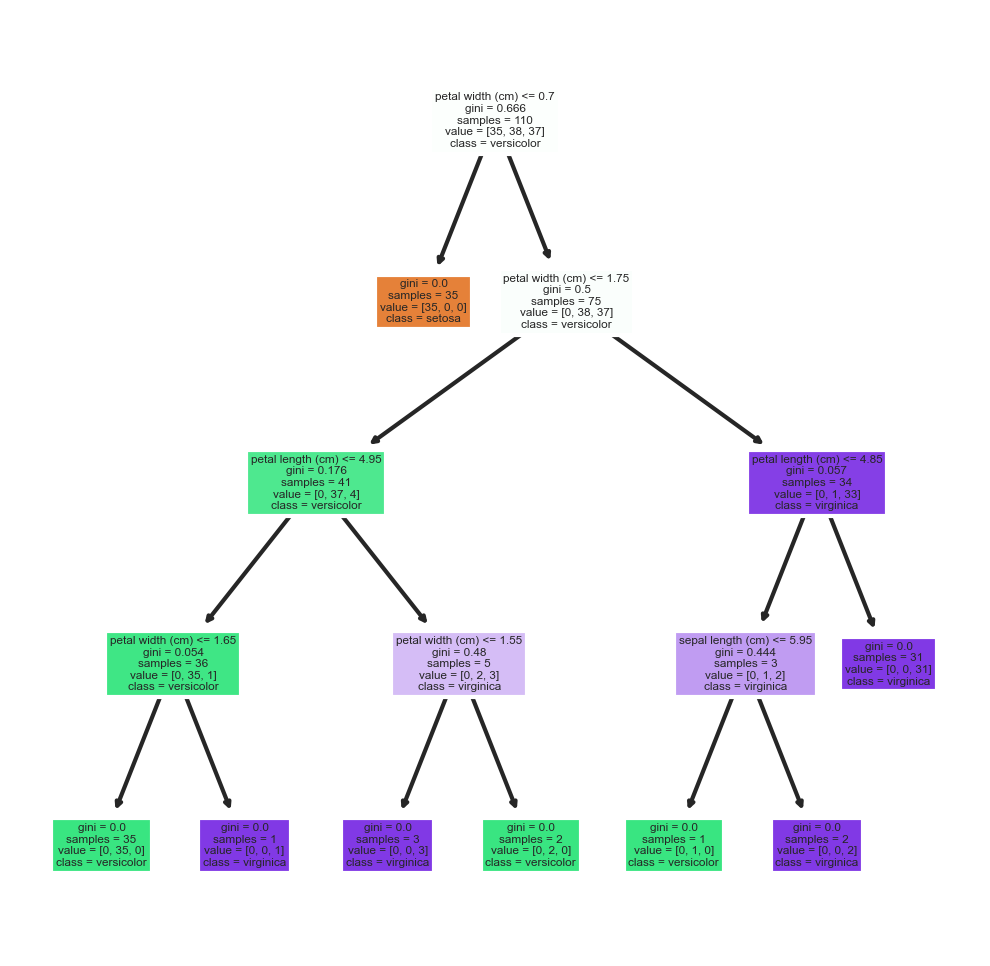

In [151]:
from sklearn import tree 
#'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True)